In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O3','C3']
psi_dihedral=['C1','O3','C3','C4']

di_sugar=['FUC', 'NAG']
patterns1= ['FUC(*_*_)]-NAG(*_*_)', 'FUC(*_*_)-NAG(*_*_)','FUC(*_*_)]-[*]-NAG(*_*_)', 'FUC(*_*_)-[*]-NAG(*_*_)']
patterns2= ['LFucpa1-3DGlcpNAcb', 'LFucpa1-3]DGlcpNAcb', 'LFucpa1-3[*]DGlcpNAcb']
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-3D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['146D', '146D', '1A14', '1ABR', '1ABR', '1AGM', '1AGM', '1AX0', '1AX1', '1AX2', '1AXY', '1AXZ', '1AY2', '1B37', '1B5F', '1B5F', '1B5F', '1B5F', '1B5Q', '1BCS', '1BHG', '1BHG', '1BJI', '1BLF', '1BP8', '1BP8', '1BP8', '1BP8', '1BZB', '1C1Z', '1C39', '1C39', '1C3M', '1CAP', '1CF3', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CP8', '1CP8', '1CPO', '1CT1', '1CT1', '1CVI', '1CVI', '1CVI', '1CVN', '1CVN', '1CVN', '1CVN', '1CXP', '1CXP', '1D2V', '1D2V', '1D5L', '1D5L', '1D7W', '1D7W', '1D83', '1D83', '1DBG', '1DBO', '1DEO', '1DEX', '1DGL', '1DGL', '1DIY', '1DL2', '1DN2', '1DN2', '1DNU', '1DNU', '1DNW', '1DNW', '1DOG', '1DOG', '1DP5', '1DPJ', '1DWA', '1DWA', '1DWF', '1DWF', '1DWG', '1DWG', '1DWH', '1DWH', '1DWI', '1DWI', '1DWJ', '1DWJ', '1DZH', '1E04', '1E05', '1E4K', '1E4K', '1E4M', '1E4M', '1E6Q', '1E6Q', '1E6S', '1E6S', '1E6X', '1E6X', '1E70', '1E70', '1E71', '1E71', '1E72', '1E72', '1E73', '1E73

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 7 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 7 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 658 
valid torsion1 and torsion2: (658, 658)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['4.C', '1.C'], ['1C4', '4C1'])
(['4.D', '1.D'], ['1C4', '4C1'])
(['2.B', '1.B'], ['1C4', '4C1'])
(['5.H', '1.H'], ['1C4', '4C1'])
(['6.H', '1.H'], ['1C4', '4C1'])
(['2.E', '1.E'], ['1C4', '4C1'])
(['4.E', '1.E'], ['1C4', '4C1'])
(['4.P', '1.P'], ['1C4', '-'])
(['4.N', '1.N'], ['1C4', '4C1'])
(['7.B', '1.B'], ['1C4', '4C1'])
(['2.E', '1.E'], ['1C4', '4C1'])
(['2.D', '1.D'], ['1C4', '4C1'])
(['7.C', '1.C'], ['1C4', '4C1'])
(['5.S', '1.S'], ['1C4', '4C1'])
(['6.S', '1.S'], ['1C4', '4C1'])
(['2.I', '1.I'], ['1C4', '4C1'])
(['4.I', '1.I'], ['1C4', '4C1'])
(['2.J', '1.J'], ['1C4', '4C1'])
(['4.J', '1.J'], ['1C4', '4C1'])
(['2.B', '1.B'], ['1C4', '4C1'])
(['2.C', '1.C'], ['1C4', '4C1'])
(['2.B', '1.B'], ['1C4', '4C1'])
(['7.F', '1.F'], ['1C4', '4C1'])
(['2.E', '1.E'], ['1C4', '4C1'])
(['2.G', '1.G'], ['1C4', '4C1'])
(['2.D', '1.D'], ['1C4', '4C1'])
(['5.E', '1.E'], ['1C4', '4C1'])
(['6.E', '1.E'], ['1C4', '4C1'])
(['6.D', '1.D'], ['1C4', '-'])
(['2.E', '1.E'], ['1C4', '4C1'])
(['2.M', '1.M'

In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//2xwe.pdb C FUC 4 C1
../../pdbs//2xwe.pdb C NAG 1 O3
7845 7815
Connection found between 7845 and 7815
../../pdbs//2xwe.pdb D FUC 4 C1
../../pdbs//2xwe.pdb D NAG 1 O3
7894 7864
Connection found between 7894 and 7864
../../pdbs//7l67.pdb B FUC 2 C1
../../pdbs//7l67.pdb B NAG 1 O3
1146 1141
Connection found between 1146 and 1141
../../pdbs//6pd4.pdb H FUC 5 C1
../../pdbs//6pd4.pdb H NAG 1 O3
7021 6980
Connection found between 7021 and 6980
../../pdbs//6pd4.pdb H FUC 6 C1
../../pdbs//6pd4.pdb H NAG 1 O3
7031 6980
No connection found between 7031 and 6980
4
../../pdbs//6pd4.pdb E FUC 2 C1
../../pdbs//6pd4.pdb E NAG 1 O3
6881 6876
Connection found between 6881 and 6876
../../pdbs//6pd4.pdb E FUC 4 C1
../../pdbs//6pd4.pdb E NAG 1 O3
6905 6876
No connection found between 6905 and 6876
6
../../pdbs//5elc.pdb P FUC 4 C1
../../pdbs//5elc.pdb P NAG 1 O3
8566 8540
Connection found between 8566 and 8540
../../pdbs//5elc.pdb N FUC 4 C1
../../pdbs//5elc.pdb N NAG 1 O3
8474 8448
Connection f

In [13]:
output_df.to_csv('LFucpa1-3DGlcpNAcb_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv('LFucpa1-3DGlcpNAcb_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [14]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [15]:
instant1.torsions

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,2xwe.pdb,C FUC 4 C2 C1 NAG 1 O3 C3,C FUC 4 C1 NAG 1 O3 C3 C4,167.387,141.6990,"([FUC(4_C_), NAG(1_C_)], [63.02, 34.84])",BMA(3_C_)-NAG(2_C_)-[FUC(4_C_)]-NAG(1_C_)-ASN(...,DManpb1-4DGlcpNAcb1-4[LFucpa1-3]DGlcpNAcb1-ASN,"([4.C, 1.C], [1C4, 4C1])"
1,2xwe.pdb,D FUC 4 C2 C1 NAG 1 O3 C3,D FUC 4 C1 NAG 1 O3 C3 C4,164.466,136.1450,"([FUC(4_D_), NAG(1_D_)], [47.91, 32.5])",BMA(3_D_)-NAG(2_D_)-[FUC(4_D_)]-NAG(1_D_)-ASN(...,DManpb1-4DGlcpNAcb1-4[LFucpa1-3]DGlcpNAcb1-ASN,"([4.D, 1.D], [1C4, 4C1])"
2,7l67.pdb,B FUC 2 C2 C1 NAG 1 O3 C3,B FUC 2 C1 NAG 1 O3 C3 C4,165.840,127.6990,"([FUC(2_B_), NAG(1_B_)], [10.44, 12.33])",FUC(2_B_)-NAG(1_B_),LFucpa1-3DGlcpNAcb1-ROH,"([2.B, 1.B], [1C4, 4C1])"
3,6pd4.pdb,H FUC 5 C2 C1 NAG 1 O3 C3,H FUC 5 C1 NAG 1 O3 C3 C4,161.234,133.9590,"([FUC(5_H_), NAG(1_H_)], [49.3, 44.9])",FUC(6_H_)-[BMA(4_H_)-BMA(3_H_)-NAG(2_H_)]-[FUC...,DManpb1-6DManpa1-4DGlcpNAcb1-4[LFucpb1-6][LFuc...,"([5.H, 1.H], [1C4, 4C1])"
4,6pd4.pdb,H FUC 6 C2 C1 NAG 1 O3 C3,H FUC 6 C1 NAG 1 O3 C3 C4,212.131,347.7580,"([FUC(6_H_), NAG(1_H_)], [46.98, 44.9])",FUC(6_H_)-[BMA(4_H_)-BMA(3_H_)-NAG(2_H_)]-[FUC...,DManpb1-6DManpa1-4DGlcpNAcb1-4[LFucpb1-6][LFuc...,"([6.H, 1.H], [1C4, 4C1])"
...,...,...,...,...,...,...,...,...,...
653,6n4y.pdb,L FUC 6 C2 C1 NAG 1 O3 C3,L FUC 6 C1 NAG 1 O3 C3 C4,182.139,340.4797,"([FUC(6_L_), NAG(1_L_)], [96.14, 104.73])",FUC(6_L_)-[MAN(4_L_)-BMA(3_L_)-NAG(2_L_)]-[FUC...,DManpa1-6DManpb1-4DGlcpNAcb1-4[LFucpa1-6][LFuc...,"([6.L, 1.L], [1C4, 4C1])"
654,5l2j.pdb,C FUC 6 C2 C1 NAG 1 O3 C3,C FUC 6 C1 NAG 1 O3 C3 C4,164.259,140.5770,"([FUC(6_C_), NAG(1_C_)], [28.35, 15.89])",FUC(7_C_)-[MAN(5_C_)-[MAN(4_C_)]-BMA(3_C_)-NAG...,DManpa1-3[DManpa1-6]DManpb1-4DGlcpNAcb1-4[LFuc...,"([6.C, 1.C], [1C4, 4C1])"
655,5l2j.pdb,C FUC 7 C2 C1 NAG 1 O3 C3,C FUC 7 C1 NAG 1 O3 C3 C4,223.511,339.1784,"([FUC(7_C_), NAG(1_C_)], [21.33, 15.89])",FUC(7_C_)-[MAN(5_C_)-[MAN(4_C_)]-BMA(3_C_)-NAG...,DManpa1-3[DManpa1-6]DManpb1-4DGlcpNAcb1-4[LFuc...,"([7.C, 1.C], [1C4, 4C1])"
656,2xwd.pdb,C FUC 4 C2 C1 NAG 1 O3 C3,C FUC 4 C1 NAG 1 O3 C3 C4,203.059,142.0990,"([FUC(4_C_), NAG(1_C_)], [59.1, 36.29])",MAN(3_C_)-NAG(2_C_)-[FUC(4_C_)]-NAG(1_C_)-ASN(...,DManpa1-4DGlcpNAcb1-4[LFucpa1-3]DGlcpNAcb1-ASN,"([4.C, 1.C], [-, 4C1])"


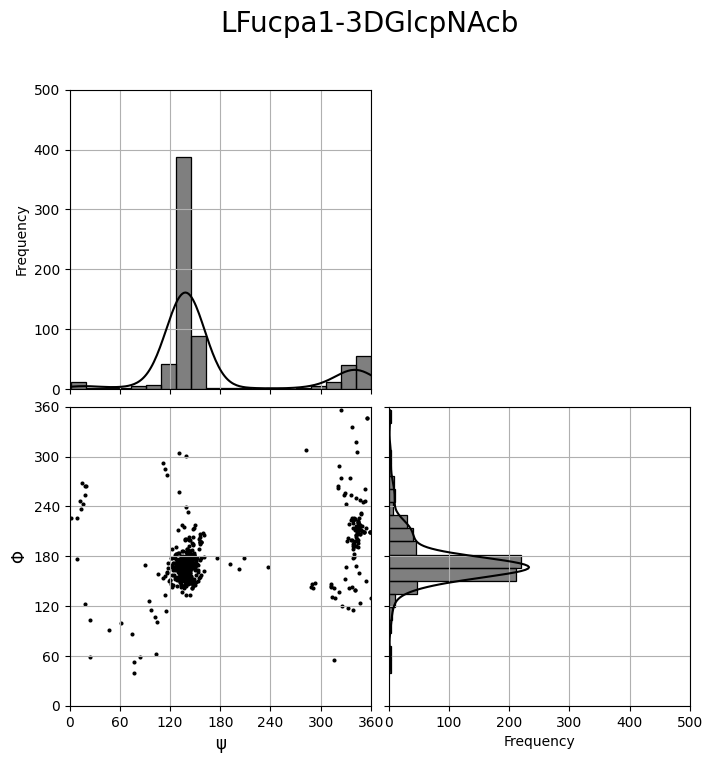

In [17]:
instant1.plot(torsions=instant1.torsions, title='LFucpa1-3DGlcpNAcb',max_histogram_scale=500,step_histogram_tick=100)